# Explonatory data analysis / Cubic-Zirconia

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/cubic_zirconia.csv')
df.head()

Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779

In [3]:
# Removing unwanted column from dataset

df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head(10)

carat        cut color clarity  depth  table     x     y     z  price
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779
5   1.02      Ideal     D     VS2   61.5   56.0  6.46  6.49  3.99   9502
6   1.01       Good     H     SI1   63.7   60.0  6.35  6.30  4.03   4836
7   0.50    Premium     E     SI1   61.5   62.0  5.09  5.06  3.12   1415
8   1.21       Good     H     SI1   63.8   64.0  6.72  6.63  4.26   5407
9   0.35      Ideal     F     VS2   60.5   57.0  4.52  4.60  2.76    706

In [5]:
# Number of rows and columns in dataset

print('The dataset contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The dataset contains 26967 rows and 10 columns


In [6]:
# Basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
# Basic summary statistics about the dataset

df.describe().T     # .T for transpose of matrix

count         mean          std    min     25%      50%      75%  \
carat  26967.0     0.798375     0.477745    0.2    0.40     0.70     1.05   
depth  26270.0    61.745147     1.412860   50.8   61.00    61.80    62.50   
table  26967.0    57.456080     2.232068   49.0   56.00    57.00    59.00   
x      26967.0     5.729854     1.128516    0.0    4.71     5.69     6.55   
y      26967.0     5.733569     1.166058    0.0    4.71     5.71     6.54   
z      26967.0     3.538057     0.720624    0.0    2.90     3.52     4.04   
price  26967.0  3939.518115  4024.864666  326.0  945.00  2375.00  5360.00   

            max  
carat      4.50  
depth     73.60  
table     79.00  
x         10.23  
y         58.90  
z         31.80  
price  18818.00

In [8]:
numerical_var = [i for i in df.columns if df.dtypes[i]!='object']
categorical_var = [i for i in df.columns if df.dtypes[i]=='object']

### Observations
*  The dataset conatains **26967** rows and **10** columns
*  There are **7** numerical and **3** categorical variables

## Categorical variables

In [9]:
df.describe(include='object').T

count unique    top   freq
cut      26967      5  Ideal  10816
color    26967      7      G   5661
clarity  26967      8    SI1   6571

In [10]:
# Checking for missing values

df[categorical_var].isna().sum()

cut        0
color      0
clarity    0
dtype: int64

In [11]:
# Checking for any 0 values

print('Number of rows with 0s in cut: {}'.format((df.cut==0).sum()))
print('Number of rows with 0s in color: {}'.format((df.color==0).sum()))
print('Number of rows with 0s in clarity: {}'.format((df.clarity==0).sum()))

Number of rows with 0s in cut: 0
Number of rows with 0s in color: 0
Number of rows with 0s in clarity: 0


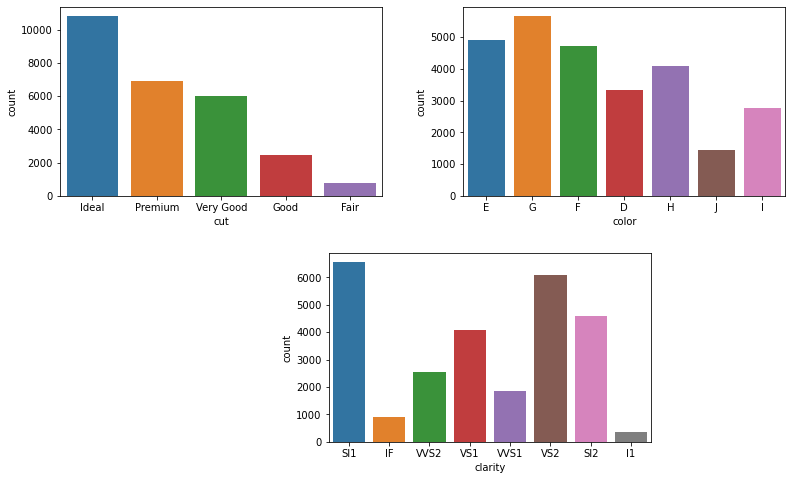

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

plt.figure(figsize=(13,8))

gs = gridspec.GridSpec(2,6)
gs.update(wspace = 1.5, hspace = 0.3)

ax1 = plt.subplot(gs[0, :3])
sns.countplot(df[categorical_var[0]])

ax2 = plt.subplot(gs[0, 3:6])
sns.countplot(df[categorical_var[1]])

ax3 = plt.subplot(gs[1,2:5])
sns.countplot(df[categorical_var[2]])

plt.show()

### Observations
*  There are **no missing values** in any of the categorical variables.
*  None of the columns contains **zero's**.
*  Counts of all distinct values are represented in graph.


## Numerical variables

In [13]:
# There are many missing values in 'depth' attribute

In [14]:
numerical_var

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [15]:
# x,y and z attributes are the dimensions of the diamond.
# To check if any dimension-less diamond

for i in numerical_var:
    print('Number of rows with 0\'s in {}: {}'.format(i, (df[i]==0).sum()))

Number of rows with 0's in carat: 0
Number of rows with 0's in depth: 0
Number of rows with 0's in table: 0
Number of rows with 0's in x: 3
Number of rows with 0's in y: 3
Number of rows with 0's in z: 9
Number of rows with 0's in price: 0


In [16]:
# Checking for missing values

df[numerical_var].isna().sum()

carat      0
depth    697
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [17]:
# Filling missing values with it's mean

df['depth'].fillna(np.nanmean(df.depth), inplace=True)
df[numerical_var].isna().sum()

carat    0
depth    0
table    0
x        0
y        0
z        0
price    0
dtype: int64

In [18]:
# Checking for duplicate values

df.duplicated().sum()

34

In [19]:
# Dropping duplicate values

print('Rows and columns before dropping duplicates {}'.format(df.shape))
df.drop_duplicates(inplace=True)
print('Rows and columns after dropping duplicates {}'.format(df.shape))

Rows and columns before dropping duplicates (26967, 10)
Rows and columns after dropping duplicates (26933, 10)


[]

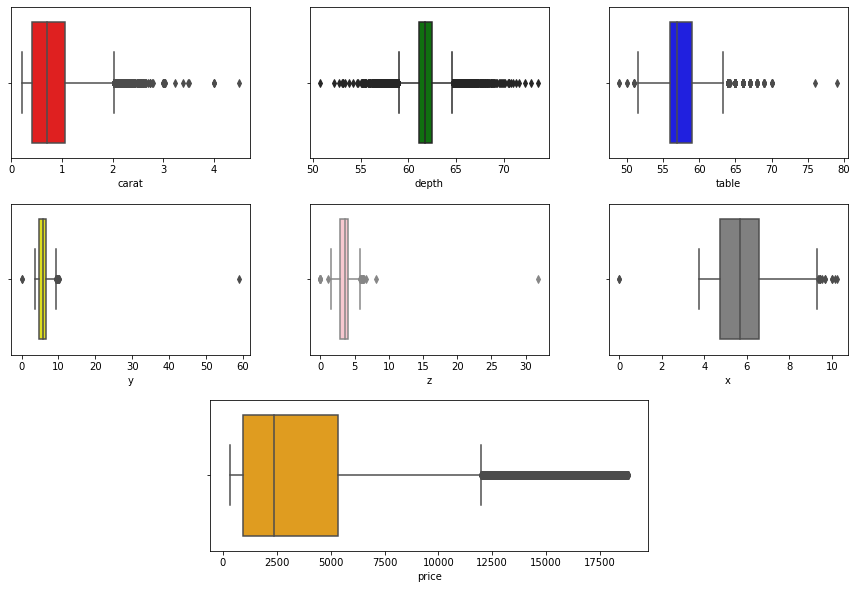

In [20]:
# Cheking for outliers visually

plt.figure(figsize=(15,10))

gs1 = gridspec.GridSpec(3,9)
gs1.update(wspace = 1.5, hspace = 0.3)

ax1 = plt.subplot(gs1[0, :3])
sns.boxplot(df.carat, color='r')

ax2 = plt.subplot(gs1[0,3:6])
sns.boxplot(df.depth, color='g')

ax3 = plt.subplot(gs1[0,6:])
sns.boxplot(df.table, color='b')

ax4 = plt.subplot(gs1[1,6:])
sns.boxplot(df.x, color='gray')

ax5 = plt.subplot(gs1[1,:3])
sns.boxplot(df.y, color='yellow')

ax6 = plt.subplot(gs1[1,3:6])
sns.boxplot(df.z, color='pink')

ax7 = plt.subplot(gs1[2,2:7])
sns.boxplot(df.price, color='orange')

plt.plot()

In [21]:
# Removing outliers

def rm_outlier(col):
    _col = sorted(col)
    
    Q1, Q3 = np.percentile(_col, [25,75])
    
    iqr = Q3 - Q1
    lower_range = Q1 - (1.5 * iqr)
    upper_range = Q3 + (1.5 * iqr)
    
    return (lower_range, upper_range)

for col in df[numerical_var]:
    lb, ub = rm_outlier(df[col])
    df[col] = np.where(df[col] > ub, ub, df[col])
    df[col] = np.where(df[col] < lb, lb, df[col])

[]

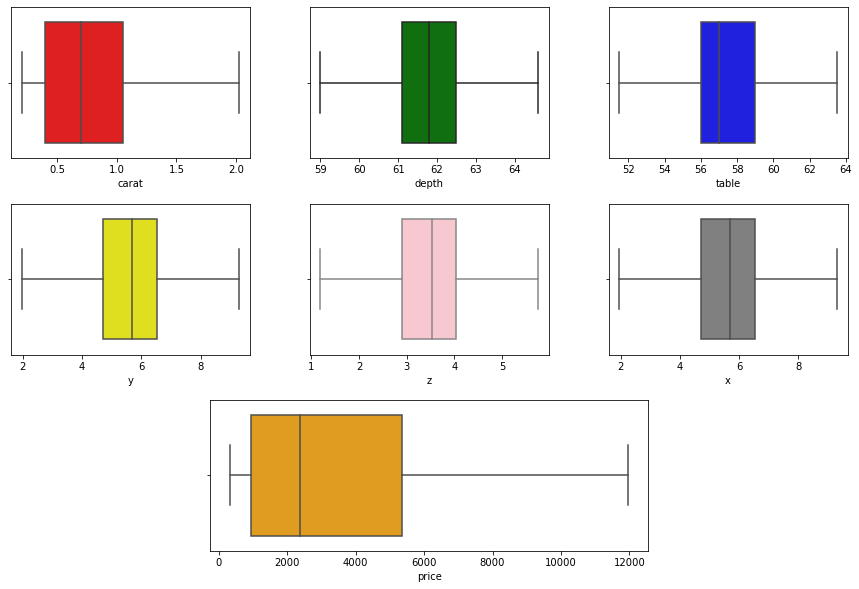

In [22]:
# After removal of outliers

plt.figure(figsize=(15,10))

gs1 = gridspec.GridSpec(3,9)
gs1.update(wspace = 1.5, hspace = 0.3)

ax1 = plt.subplot(gs1[0, :3])
sns.boxplot(df.carat, color='r')

ax2 = plt.subplot(gs1[0,3:6])
sns.boxplot(df.depth, color='g')

ax3 = plt.subplot(gs1[0,6:])
sns.boxplot(df.table, color='b')

ax4 = plt.subplot(gs1[1,6:])
sns.boxplot(df.x, color='gray')

ax5 = plt.subplot(gs1[1,:3])
sns.boxplot(df.y, color='yellow')

ax6 = plt.subplot(gs1[1,3:6])
sns.boxplot(df.z, color='pink')

ax7 = plt.subplot(gs1[2,2:7])
sns.boxplot(df.price, color='orange')

plt.plot()

### Observations

*  There are many diamonds **without dimensions** i.e x or y or z values are zero.
*  There are **34 duplicate** values in numerical variables.
*  **697 values** are missing in attribute **'depth'**.
*  Almost all the numerical variables **contains ourliers**.

# Univariate and Bivariate analysis

[]

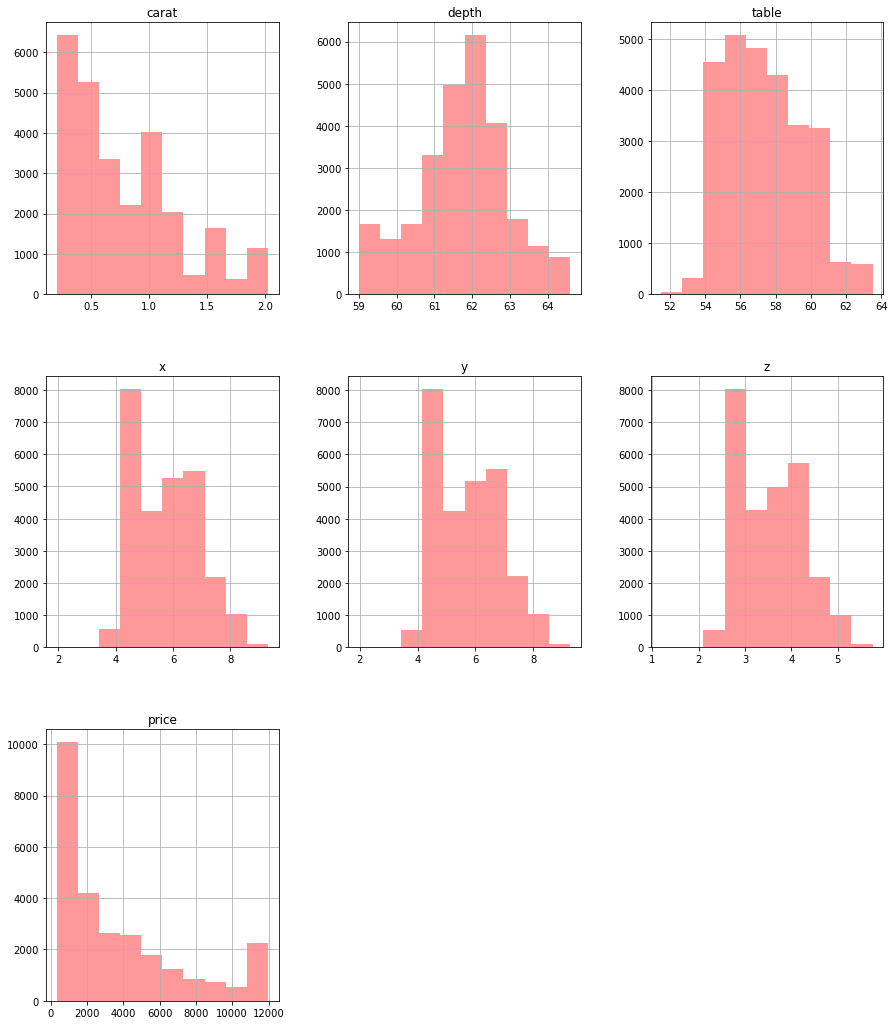

In [23]:
df.hist(figsize=(15,18), color='red',alpha=0.4)
plt.plot()

In [24]:
# Skewness of numerical variables

df.skew()

carat    0.917162
depth   -0.191173
table    0.480121
x        0.395196
y        0.391510
z        0.384522
price    1.157688
dtype: float64

In [40]:
# Kurtosis of numerical variables

df.kurtosis()

carat    0.149892
depth    0.073775
table   -0.012680
x       -0.734651
y       -0.741189
z       -0.707700
price    0.228145
dtype: float64

<AxesSubplot:>

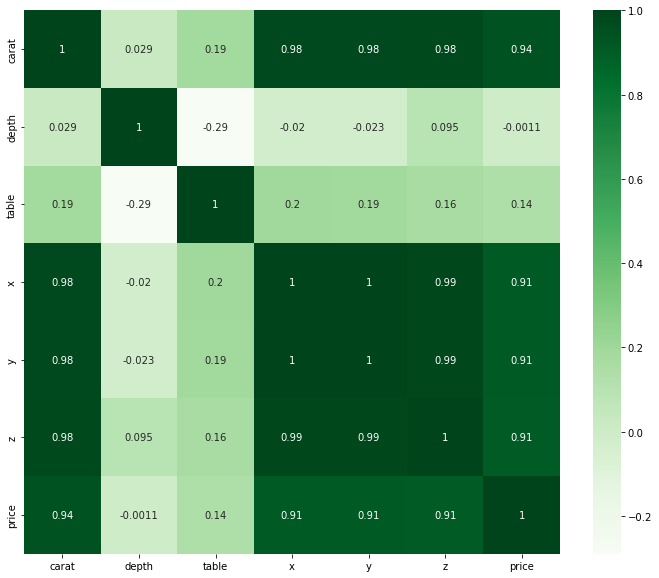

In [25]:
# Checking for correlation between variables  --Bivariate
plt.figure(figsize=(12,10))
sns.heatmap(df[numerical_var].corr(), cmap='Greens', annot=True)

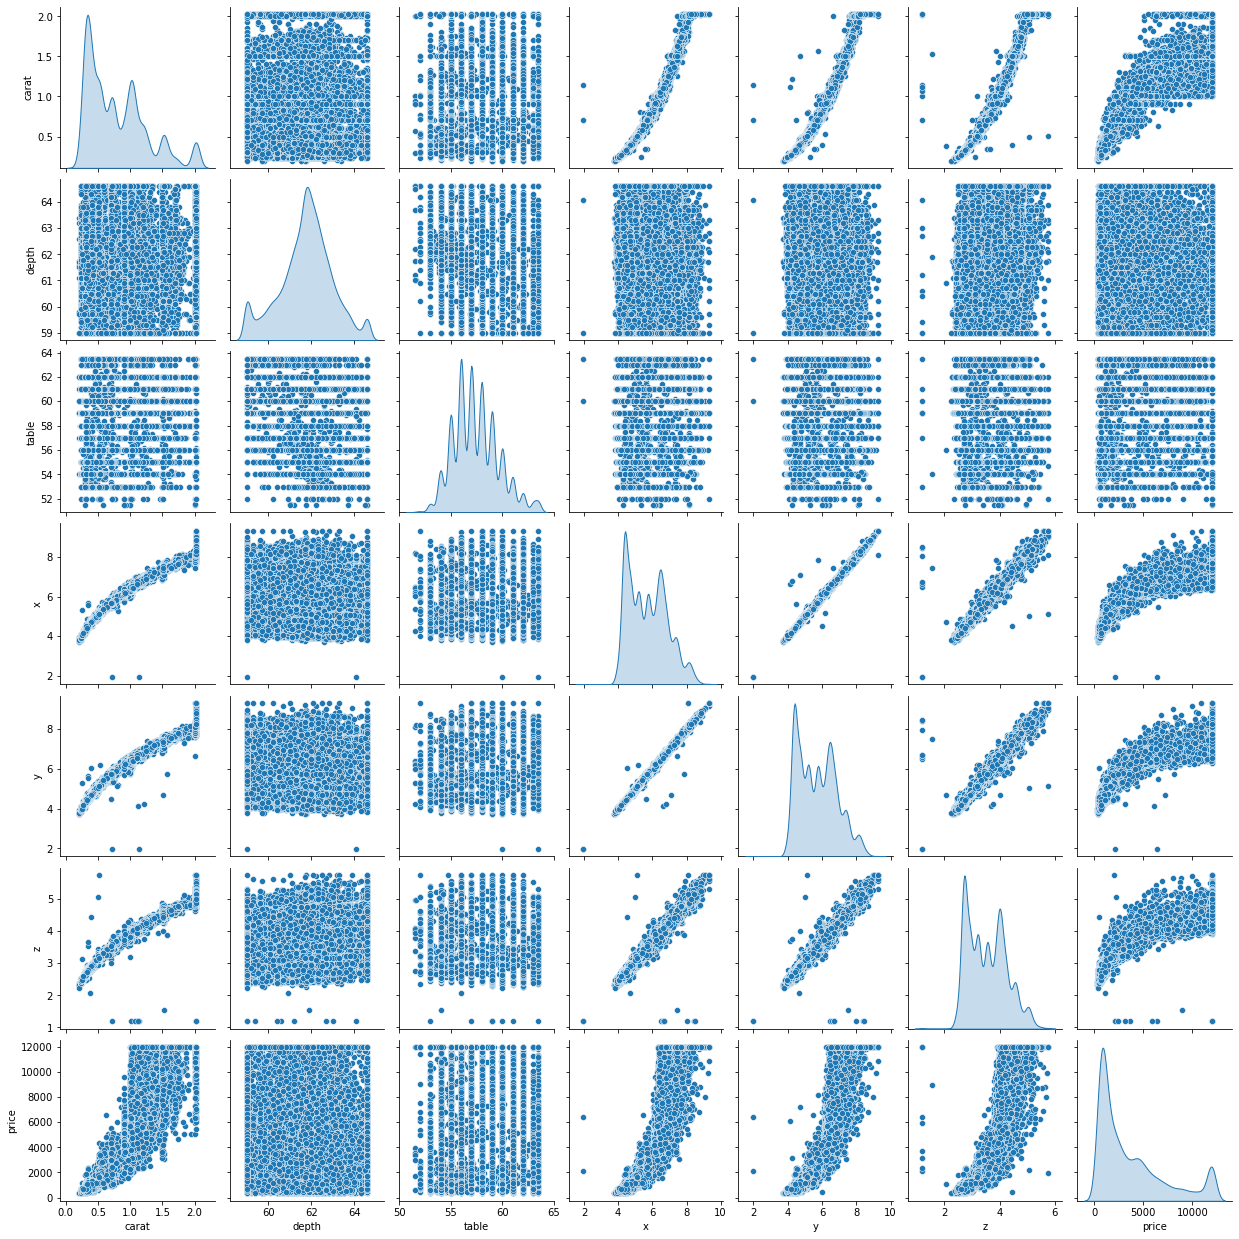

In [26]:
sns.pairplot(df, diag_kind='kde')

### Observations
*  Histograms shows the distribution of all the numerical variables
*  All the numerical variables except depth are **positively skewed**.
*  All the dimensions(x,y,z) and table attributes are **platykurtic (Lesser in height)**.
*  Dimensions and carat are **highly correlated** to each other.

# Multivarite Analysis

In [27]:
# PCA is a process of figuring out most important features or principal components that has the most
# impact on the target variable
# PCA is designed for continuous varibles, it is a dimensionality reuction technique.
# Principal components are latent variables(artificial) which are created mathematically using the
# combination of observed varibles/ features

In [28]:
# If we consider price as a target values, then we need to extract principal components from remaining 
# variables

In [29]:
X = df[numerical_var]
X.drop('price', axis=1, inplace=True)
X.head()

carat  depth  table     x     y     z
0   0.30   62.1   58.0  4.27  4.29  2.66
1   0.33   60.8   58.0  4.42  4.46  2.70
2   0.90   62.2   60.0  6.04  6.12  3.78
3   0.42   61.6   56.0  4.82  4.80  2.96
4   0.31   60.4   59.0  4.35  4.43  2.65

In [30]:
# First we need to standardize data to apply PCA

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
std_df = scalar.fit_transform(X)

std_df

array([[-1.06747072,  0.28802859,  0.26167615, -1.29584662, -1.28898214,
        -1.25861627],
       [-1.00255226, -0.77887376,  0.26167615, -1.16264994, -1.13694318,
        -1.20120602],
       [ 0.23089845,  0.370098  ,  1.18885573,  0.27587417,  0.34767256,
         0.3488707 ],
       ...,
       [-0.61304151, -0.04024906,  0.26167615, -0.54106545, -0.51984387,
        -0.5266356 ],
       [-1.13238917,  0.04182035, -0.66550343, -1.36688485, -1.36947335,
        -1.34473165],
       [ 0.98828046,  0.20595917,  0.26167615,  1.03953513,  1.02737614,
         1.05214625]])

In [31]:
std_df.shape

(26933, 6)

In [32]:
# Using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pc = pca.fit_transform(std_df)

In [33]:
pc.shape

(26933, 3)

In [41]:
pca.explained_variance_ratio_*100

array([66.72405055, 21.27929777, 11.45156767])

In [42]:
# Total variation explained by all the principal components

np.sum(pca.explained_variance_ratio_)*100

99.45491598852178

In [35]:
pc_df = pd.DataFrame(pc)
pc_df

0         1         2
0     -2.405199  0.159503  0.613138
1     -2.204478  0.933004 -0.125852
2      0.742890  0.471974  1.065692
3     -1.707226 -0.221733 -0.421015
4     -2.249715  1.494299  0.001926
...         ...       ...       ...
26928  1.504939 -0.280590  0.361945
26929 -2.353128 -0.666476 -0.538930
26930 -1.060067  0.293864  0.264188
26931 -2.668858 -0.266492 -0.218500
26932  2.070653 -0.144006  0.143314

[26933 rows x 3 columns]

In [36]:
pca.n_components_

3

In [37]:
%matplotlib notebook

<IPython.core.display.Javascript object>


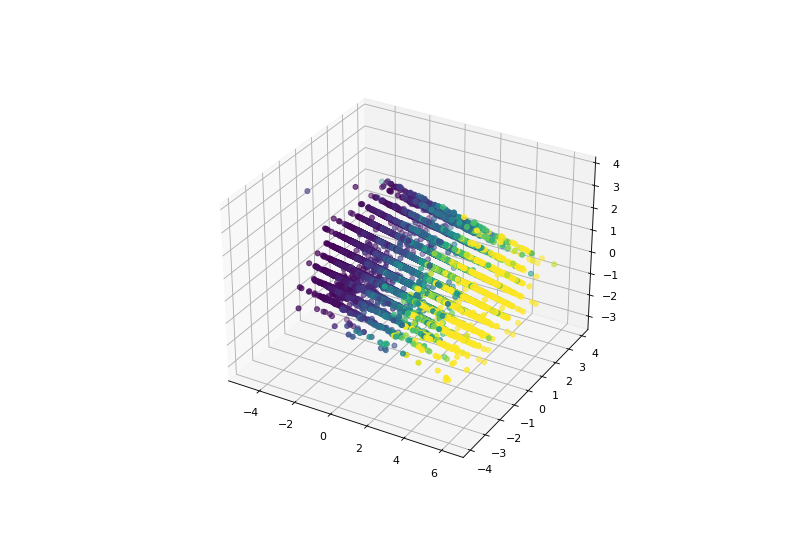

In [38]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(pc_df[0], pc_df[1], pc_df[2], c=df['price'])
plt.show()

### Observations

*  **99% variation** is explained by 3 principal components
*  We can use these 3 PC's for our analysis (If the *target variable* is **price**)